# Code

**Date: February 2017**
 

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

import warnings
warnings.filterwarnings('ignore')

colors = sns.color_palette("Blues")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

**Coin-tossing MLE consistency**


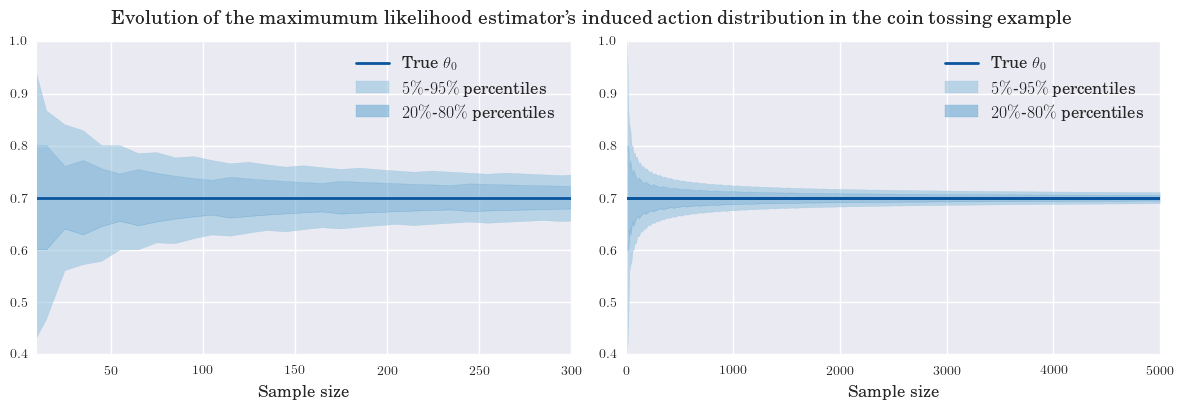

In [2]:
theta0 = .7
N = 5000

sample_sizes = np.arange(5, N, 10)

perc5 = [stats.binom(n, theta0).ppf(.05)/n for n in sample_sizes]
perc25 = [stats.binom(n, theta0).ppf(.2)/n for n in sample_sizes]
perc75 = [stats.binom(n, theta0).ppf(.8)/n for n in sample_sizes]
perc95 = [stats.binom(n, theta0).ppf(.95)/n for n in sample_sizes]

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle("Evolution of the maximumum likelihood estimator's induced action distribution in the coin tossing example", y = 1.02, fontsize = 14)
small_sample = 200
ax[0].fill_between(sample_sizes[:small_sample], perc5[:small_sample], perc25[:small_sample], 
                   color = colors[2], alpha = .5, label = '$5\%$-$95\%$ percentiles')
ax[0].fill_between(sample_sizes[:small_sample], perc25[:small_sample], perc75[:small_sample], 
                   color = colors[3], alpha = .5, label = '$20\%$-$80\%$ percentiles')
ax[0].fill_between(sample_sizes[:small_sample], perc75[:small_sample], perc95[:small_sample], 
                   color = colors[2], alpha = .5)
ax[0].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
ax[0].set_xlim([10, 300])
ax[0].set_ylim([0.4, 1])
ax[0].set_xlabel('Sample size', fontsize = 12)
ax[0].legend(loc='best', fontsize = 12)

ax[1].fill_between(sample_sizes, perc5, perc25, color = colors[2], alpha = .5, label = '$5\%$-$95\%$ percentiles')
ax[1].fill_between(sample_sizes, perc25, perc75, color = colors[3], alpha = .5, label = '$20\%$-$80\%$ percentiles')
ax[1].fill_between(sample_sizes, perc75, perc95, color = colors[2], alpha = .5)
ax[1].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
ax[1].set_ylim([0.4, 1])
ax[1].set_xlabel('Sample size', fontsize = 12)
ax[1].legend(loc='best', fontsize = 12)
ax[1].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
plt.tight_layout()
plt.savefig('asymptotic_cointoss_consistency.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Uniform LLN -- coin-tossing tail probabilities**

In [3]:
def loss_cdf(l_value, aa, true_dist, upper_part):
    """
    Uses the formula for the change of discrete random variable. It 
    takes care of the fact that the quadratic loss is non-monotone.
    
    L(theta0, a) = theta0*(1-a)**2 + (1-theta0)*a**2 
    
    Emprical loss = l_value implies the following empirical dist 
        p_n = (l - a**2)/((1 - a)**2 - a**2)
    """
    
    n, theta0 = true_dist.args
    
    # p_n corresponding to l_value and aa is 
    p_n = (l_value - aa**2)/((1 - aa)**2 - aa**2)  
    y_n = int(p_n * n)
    
    # plot p_n(a), it's a hyperbola with break at a=.5 
    if aa < .5:            # for a given aa, emp loss is increasing in p_n 
        if upper_part:                         # prob(emp loss > l_value)
            return 1 - true_dist.cdf(y_n)
        else:                                  # prob(emp loss < l_value)
            return true_dist.cdf(y_n)
    else:                  # for a given a, emp loss is decreasing in p_n 

        if upper_part:                         # prob(emp loss > l_value)
            return true_dist.cdf(y_n)
        else:                                  # prob(emp loss < l_value)
            return 1 - true_dist.cdf(y_n)

        
def prob(delta, a, true_dist):
    """
    We want the probability
        |L_n - L| > delta
        
    The random variable is L_n and the intervals of interest
        L_n < L-delta < L+delta < L_n
    
    Prob = CDF(L-delta) + (1 - CDF(L+delta))
    """
    n, theta0 = true_dist.args
    L = theta0 * (1 - a)**2 + (1 - theta0) * a**2
        
    upper_part = loss_cdf(L + delta, a, true_dist, upper_part = True)
    lower_part = loss_cdf(L - delta, a, true_dist, upper_part = False)
    
    return lower_part + upper_part

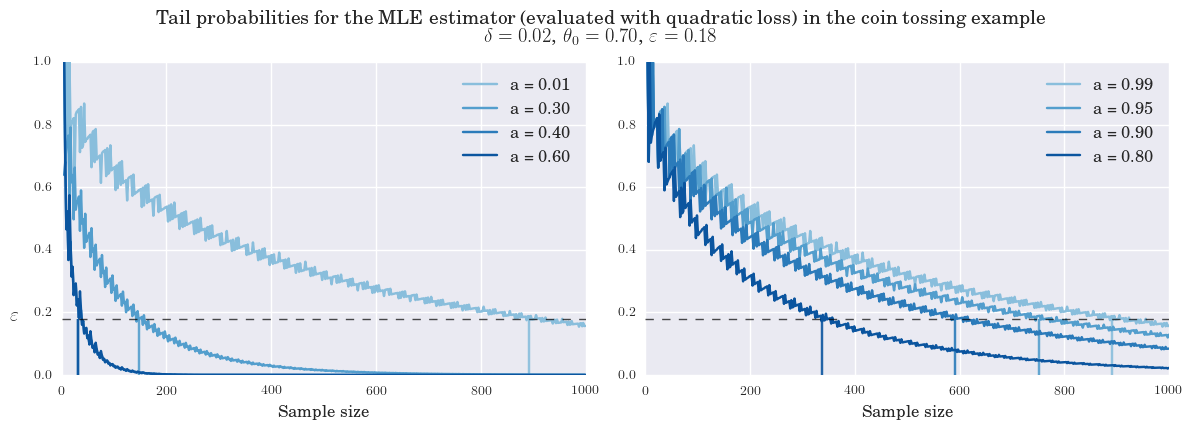

In [4]:
sample_size = np.arange(5, 1000, 2)
action_grid1 = [.01, .3, .4, .6]
action_grid2 = [.99, .95, .9, .8]
delta = .02
epsilon = .18

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Tail probabilities for the MLE estimator (evaluated with quadratic loss) in the coin tossing example \n' + 
             r"$\delta = {:1.2f}$,  $\theta_0 = {:1.2f}$, $\varepsilon = {:1.2f}$".format(delta, theta0, epsilon), 
            fontsize = 14, y = 1.07)
for i, a in enumerate(action_grid1):
    ax[0].plot(sample_size, [prob(delta, a, stats.binom(nn, theta0)) for nn in sample_size], 
               label = r'a = {:1.2f}'.format(a), color = colors[2 + i])
    n_star = sp.optimize.bisect(lambda nn: prob(delta, a, stats.binom(nn, theta0))-epsilon, .1, 1000)
    ax[0].vlines(n_star, 0, epsilon, color = colors[2 + i], alpha = .9)
ax[0].axhline(epsilon, linestyle='--', color='k', lw =1, alpha=.7)
ax[0].legend(loc = 'best', fontsize = 12)
ax[0].set_xlabel('Sample size', fontsize = 12)
ax[0].set_ylabel(r'$\varepsilon$', fontsize = 14, rotation=0)
ax[0].yaxis.set_label_coords(-.09, .16)

for i, a in enumerate(action_grid2):
    ax[1].plot(sample_size, [prob(delta, a, stats.binom(nn, theta0)) for nn in sample_size], 
               label = r'a = {:1.2f}'.format(a), color = colors[2 + i])
    n_star = sp.optimize.bisect(lambda nn: prob(delta, a, stats.binom(nn, theta0))-epsilon, .1, 1000)
    ax[1].vlines(n_star, 0, epsilon, color = colors[2 + i], alpha = .9)
ax[1].axhline(epsilon, linestyle='--', color='k', lw =1, alpha=.7)
ax[1].legend(loc = 'best', fontsize = 12)
ax[1].set_xlabel('Sample size', fontsize = 12)
plt.tight_layout()
plt.savefig('asymptotic_cointoss_tail.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Concentration inequalities**

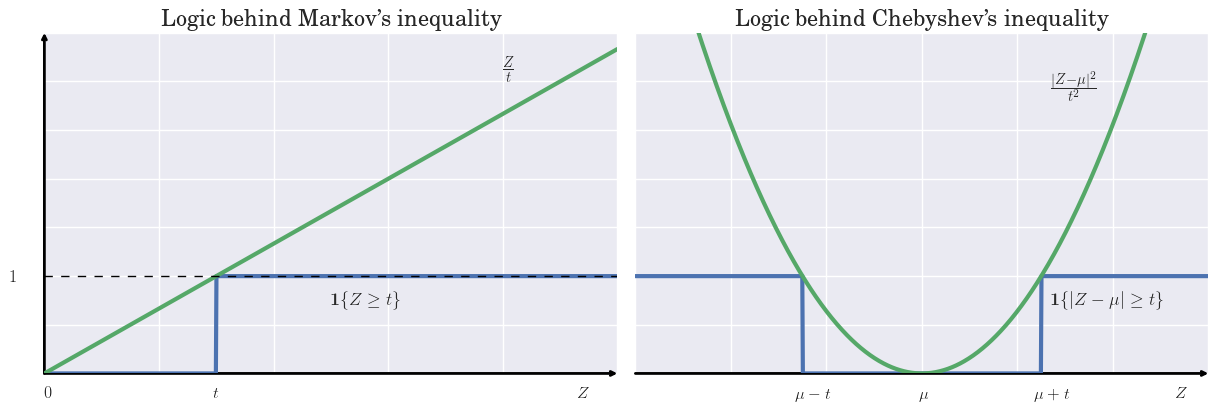

In [5]:
z = np.linspace(0, 10, 1000)
t = 3

f1 = (z >= t)
f2 = z / t

colors = sns.color_palette()

fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
ax[0].add_artist(ConnectionPatch(xyA=(0, 0), xyB=(10, 0), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))
ax[0].add_artist(ConnectionPatch(xyA=(0, 0), xyB=(0, 3.5), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))

ax[0].plot(z, f1, color = colors[0], lw = 3, label = r'$\mathbf{1}\{Z \geq t\}$')
ax[0].plot(z, f2, color = colors[1], lw = 3, label = r'$\frac{Z}{t}$')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(9.3, -.25, r'$Z$', fontsize = 12)
ax[0].text(8, 3, r'$\frac{Z}{t}$', fontsize = 15)
ax[0].text(5, .7, '$\mathbf{1}\{Z \geq t\}$', fontsize = 13)
ax[0].text(t - .05, -.25, '$t$', fontsize = 12)
ax[0].text(0, -.25, '$0$', fontsize = 12)
ax[0].text( -.6, .93, r'$1$', fontsize = 12)
ax[0].axhline(1, linestyle = '--', color = 'k', lw = 1)
ax[0].set_title('Logic behind Markov\'s inequality', fontsize=16)

t = 2.5
mu = 2
z = np.linspace(mu - 6, mu + 6, 1000)

g1 = (z >= mu + t) + (z <= mu - t)
g2 = ((z - mu) / t)**2

ax[1].add_artist(ConnectionPatch(xyA=(mu - 6, 0), xyB=(mu + 6, 0), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))
ax[1].plot(z, g1, color = colors[0], lw = 3, label = r'$\mathbf{1}\{Z \geq t\}$')
ax[1].plot(z, g2, color = colors[1], lw = 3, label = r'$Z/t$')
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].text(mu + 5.3, -.25, r'$Z$', fontsize = 12)
ax[1].text(4.7, 2.8, r'$\frac{|Z-\mu|^2}{t^2}$', fontsize = 15)
ax[1].text(4.7, .7, r'$\mathbf{1}\{|Z -\mu |\geq t\}$', fontsize = 13)
ax[1].text(mu - .05, -.25, r'$\mu$', fontsize = 12)
ax[1].text(mu + t - .15, -.25, r'$\mu + t$', fontsize = 12)
ax[1].text(mu - t - .15, -.25, r'$\mu - t$', fontsize = 12)
#ax[1].text(mu - 6 - .6, .93, r'$1$', fontsize = 12)
ax[1].set_title('Logic behind Chebyshev\'s inequality', fontsize=16)
ax[1].set_ylim([0, 3.5])
plt.tight_layout()
plt.savefig('asymptotic_markov_chebyshev.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Rademacher complexity -- coin-tossing**


In [6]:
# Compute the Rademacher compelxity for the coin tossing example
n, k = 10, 6

def given_epsilon_path(n3, n4, n, k):
    n1 = n - k - n3
    n2 = k - n4
    
    diff1 = n1 - n3
    diff2 = n2 - n4
    
    term1 = abs(diff1/n)
    term2 = abs(diff2/n)
    
    if diff1 + diff2 != 0:
        term3 = abs((diff2/(diff1 + diff2))**2 * (diff1/n) + (diff1/(diff1 + diff2))**2 * (diff2/n))
    else:
        term3 = 0
        
    return max(term1, term2, term3)
    
    
def empirical_rademacher(n, k):
    """
    This function returns the empirical rademacher complexity of the coin tossing example
    """
    prob_row = stats.binom(k, .5).pmf(np.arange(k + 1)).reshape(k + 1, 1)
    prob_col = stats.binom(n - k, .5).pmf(np.arange(n - k + 1)).reshape(1, n - k + 1)    
    prob_matrix = prob_row * prob_col
    
    emp_rad = 0
    for i in range(k + 1):               # loop for n4
        for j in range(n - k + 1):       # loop for n3
            emp_rad += given_epsilon_path(j, i, n, k) * prob_matrix[i, j]
    
    return emp_rad

def rademacher_complexity(n):
    """
    Using the true distribution of the sample, this function calculates the 
    rademacher complexity from the empirical rademacher complexity
    """
    true_prob = stats.binom(n, theta0).pmf(np.arange(n + 1)).reshape(n + 1, 1)
    rademacher = 0
    
    store_empirical = np.zeros(n+1)
    
    for i in range(n + 1):
        store_empirical[i] = empirical_rademacher(n, i)
        rademacher += true_prob[i] * store_empirical[i]
    
    return rademacher[0], store_empirical

def tail_figure(sample_size, theta0, action, tail_prob):
    """
    Returns the delta that makes the probability of 
    
        L(P_n, a) < L(P,a) - delta < L(P,a) + delta < L(P_n, a)
    
    equals to tail_prob, for a given action, theta0 and sample_size.
    """
    delta_star = sp.optimize.bisect(lambda d: prob(d, action, 
                                                   stats.binom(sample_size, theta0))-tail_prob, 1e-8, .5)
    return delta_star

```python 

samples = np.arange(10, 1000, 50)

RC_ = np.zeros(len(samples))
ERC = []

for i, n in enumerate(samples):
    rc, erc = rademacher_complexity(n)
    ERC.append(erc)
    RC_[i] = rc

data, data2  = pd.DataFrame(data=RC_), pd.DataFrame(data=ERC)
data.to_pickle("./rademacher.pickle")
data2.to_pickle("./empirical_rademacher.pickle")
```

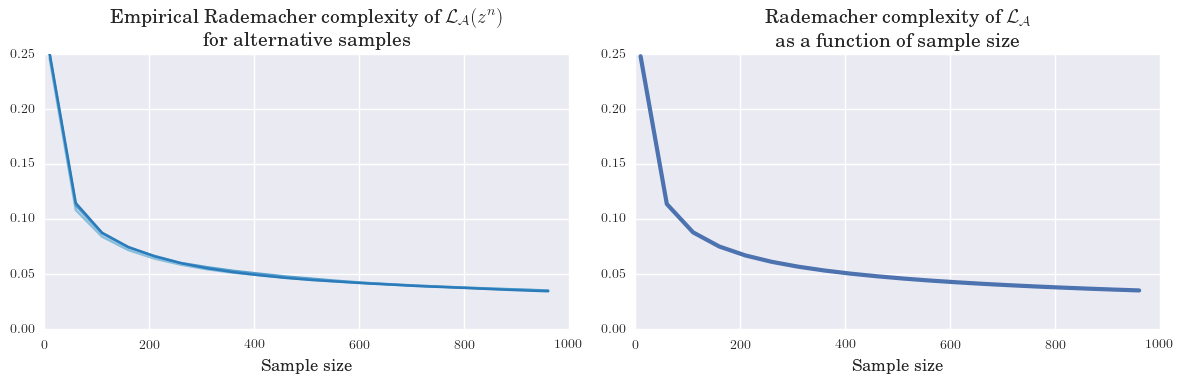

In [7]:
samples = np.arange(10, 1000, 50)
RC = np.asarray(pd.read_pickle("./rademacher.pickle")).squeeze()
emp_rad = np.asarray(pd.read_pickle("./empirical_rademacher.pickle"))

colors = sns.color_palette("Blues")

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

for j in range(3):
    z_n = np.asarray([sp.stats.binom(1, theta0).rvs() for i in range(1000)])
    cumsum_z_n = np.cumsum(z_n)

    er = []
    for i, n in enumerate(samples):
        er.append(emp_rad[i, cumsum_z_n[n]])
    
    ax[0].plot(samples, er, color = colors[2+j])
ax[0].set_title("Empirical Rademacher complexity of $\mathcal{L}_{\mathcal{A}}(z^n)$ \n \\
                    for alternative samples", fontsize = 14)
ax[0].set_xlabel('Sample size', fontsize = 12)
ax[0].set_ylim([0, .25])

ax[1].plot(samples, RC, lw = 3)
ax[1].set_title("Rademacher complexity of $\mathcal{L}_{\mathcal{A}}$ \n \\
                    as a function of sample size", fontsize = 14)
ax[1].set_xlabel('Sample size', fontsize = 12)
ax[1].set_ylim([0, .25])
plt.tight_layout()
plt.savefig('asymptotic_rademacher_cointoss.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Compare tail bounds for different actions with the Rademacher bound**

In [10]:
varepsilon = .05
aa = .99

sample_size = np.arange(5, 1000, 10)
actions = [.4, .9, .95, 1]
truths = [.01, .6, .95]

store_tailbound = np.zeros((len(sample_size), len(actions)))
store_truths = np.zeros((len(sample_size), len(truths)))

for i, n in enumerate(sample_size):
    for j, a in enumerate(actions):
        store_tailbound[i, j] = tail_figure(n, theta0, a, varepsilon)

for i, n in enumerate(sample_size):
    for j, t in enumerate(truths):
        store_truths[i, j] = tail_figure(n, t, aa, varepsilon)
        
RC_bound = 2*RC + np.sqrt(np.log(2/varepsilon)/(2*samples))
ERC_bound = 2*np.asarray(er) + np.sqrt(4*np.log(2/varepsilon)/(samples))


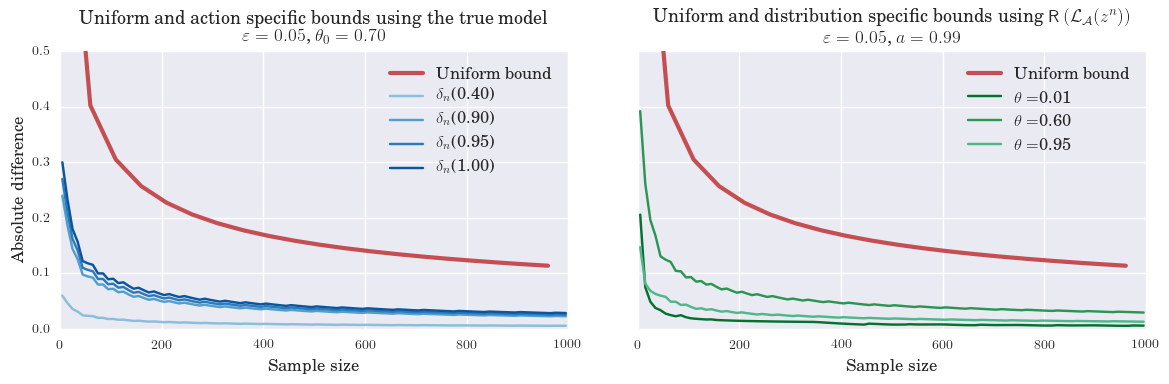

In [11]:
colors = sns.color_palette("Blues")
colors_g = sns.color_palette("BuGn_r")

fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)

ax[0].set_title('Uniform and action specific bounds using the true model\n' + 
             r"$\varepsilon = {:1.2f}$,  $\theta_0 = {:1.2f}$".format(varepsilon, theta0), fontsize = 13)
ax[0].plot(samples, RC_bound, lw = 3, color = sns.color_palette()[2], label = 'Uniform bound')
for i, a in enumerate(actions):
    ax[0].plot(sample_size, store_tailbound[:, i], label = r'$\delta_n$' + '({:1.2f})'.format(a), color = colors[2+i])
ax[0].legend(loc = 'best', fontsize = 12)
ax[0].set_xlabel('Sample size', fontsize = 12)
ax[0].set_ylabel('Absolute difference', fontsize = 12)
ax[0].set_ylim([0, .5])

ax[1].set_title(r'Uniform and distribution specific bounds using $\mathsf{R}\left(\mathcal{L}_{\mathcal{A}}(z^n)\right)$' + '\n' + 
             r"$\varepsilon = {:1.2f}$, $a = {:1.2f}$".format(varepsilon, aa), fontsize = 13)

ax[1].plot(samples, RC_bound, lw = 3, color = sns.color_palette()[2], label = 'Uniform bound')
for i, t in enumerate(truths):
    ax[1].plot(sample_size, store_truths[:, i], label = r'$\theta=$' + '{:1.2f}'.format(t), color = colors_g[i])
ax[1].legend(loc = 'best', fontsize = 12)
ax[1].set_xlabel('Sample size', fontsize = 12)
plt.tight_layout()

plt.savefig('rademacher_tail_bound.png', format = 'png', dpi=800 ,bbox_inches='tight')

**Rademacher -- sinusoid classification**

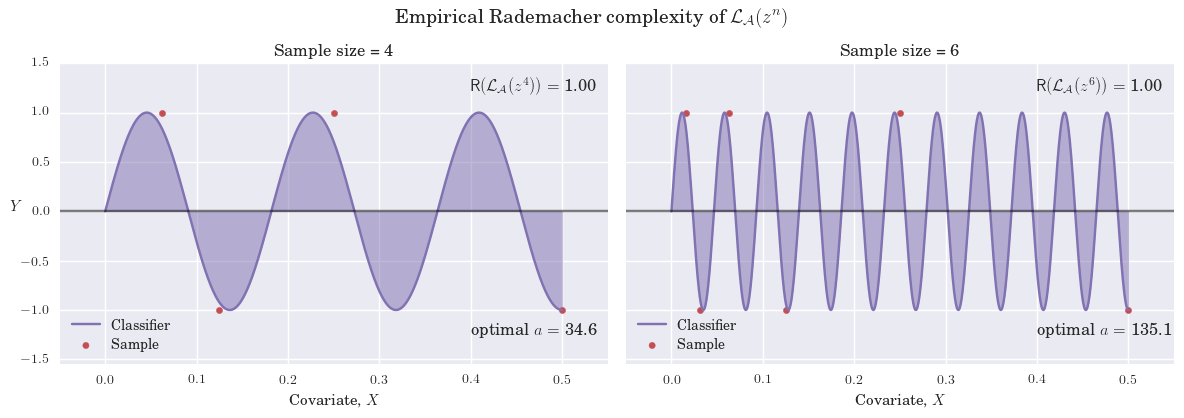

In [11]:
np.random.seed(12)
aux = np.random.rand(100)

def rademacher(n):
    '''Generates N Rademcaher random variables.'''
    return np.array([1 if x >= .5 else -1 for x in aux[:n]])

def rad_figure(n):
    x = np.array([2**(-(i+1)) for i in range(n)])
    y = rademacher(int(n))

    y_aux = np.array([1 if r > 0 else 0 for r in y])
    x_aux = np.array([2**((i+1)) for i in range(int(n))])

    a = np.pi*((1-y_aux) @ x_aux + 1)

    c = np.array([1 if np.sin(a*x) > 0 else -1 for x in x])
    R = c @ y / int(n)

    return a, x, y, R, a


n1, n2 = 4, 6

a1, x1, y1, R1, a1 = rad_figure(n1)
a2, x2, y2, R2, a2 = rad_figure(n2)

x_axis = np.linspace(0, .5, 1000)
colors = sns.color_palette()

fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
fig.suptitle(r'Empirical Rademacher complexity of $\mathcal{L}_{\mathcal{A}}(z^n)$', 
             fontsize=14, y=1.04)

sin1 = np.sin(a1*x_axis)
ax[0].plot(x_axis, sin1, color = colors[3], label = 'Classifier')
ax[0].fill_between(x_axis, 0, sin1, color = colors[3], alpha = .5)
ax[0].scatter(x1, y1, color = colors[2], label = 'Sample')
ax[0].set_xlim([-.05, .55])
ax[0].set_ylim([-1.55, 1.5])
ax[0].set_xlabel(r"Covariate, $X$")
ax[0].set_ylabel(r"$Y$", rotation = 0)
ax[0].text(.4, 1.2, r'$\mathsf{R}(\mathcal{L}_{\mathcal{A}}(' + 
           r'z^{})) = $'.format({int(n1)}) + ' {:.2f}'.format(R1), fontsize=12)
ax[0].text(.4, -1.25, r'optimal $a = $' + ' {:.1f}'.format(a1), fontsize=12)
ax[0].set_title(r'Sample size = {}'.format({int(n1)}), fontsize=12)
ax[0].axhline(0, color = 'k', alpha=.5)
ax[0].legend(loc=3)

sin2 = np.sin(a2*x_axis)
ax[1].plot(x_axis, sin2, color = colors[3], label = 'Classifier')
ax[1].fill_between(x_axis, 0, sin2, color = colors[3], alpha = .5)
ax[1].scatter(x2, y2, color = colors[2], label = 'Sample')
ax[1].set_xlim([-.05, 0.55])
ax[1].set_ylim([-1.55, 1.5])
ax[1].set_xlabel(r"Covariate, $X$")
ax[1].text(.4, 1.2, r'$\mathsf{R}(\mathcal{L}_{\mathcal{A}}(' + 
           r'z^{})) = $'.format({int(n2)}) + ' {:.2f}'.format(R2), fontsize=12)
ax[1].text(.4, -1.25, r'optimal $a = $' + ' {:.1f}'.format(a2), fontsize=12)
ax[1].set_title(r'Sample size = {}'.format({int(n2)}), fontsize=12)
ax[1].axhline(0, color = 'k', alpha=.5)
ax[1].legend(loc=3)

plt.tight_layout()
plt.savefig('asymptotic_rademacher_sinusoid.png', format = 'png', dpi=800 ,bbox_inches='tight')